<h1>Oración 3: Disparan armas que son falsas.</h1>

In [2]:
import nltk
import re

In [1]:
# Shift Reduce Parser

def sr_parser(oracion, gramatica):                   
    oracion = oracion.lower()
    if oracion.endswith('.'):
        oracion = re.sub('\.',' ',oracion)
    else:
        oracion = oracion
    lista_palabras = oracion.split()
    gramatica = nltk.data.load(gramatica, cache=False)
    sr_parser = nltk.ShiftReduceParser(gramatica)
    for arbol in sr_parser.parse(lista_palabras):
        return(arbol)                                

In [3]:
oracion3 = 'Disparan armas que son falsas.'                                    
gramatica = 'gramaticas/CFG_1.cfg'                       
sr_parser(oracion3, gramatica)                         

![](https://i.ibb.co/ZzPk16g/Screenshot-1.png)

Como se ve, el _shift reduce parser_ falla al reconocer esta oración. El motivo es que, por su propio funcionamiento, reduce o reescribe los elementos como un símbolo superior tanto como es posible hasta llegar a la raíz. En nuestro caso, _disparan_ puede ser reducido a un ```V``` y luego a un ```SV```, dada la regla ```SV -> V``` necesaria para la oración 2. Y dado que, para capturar la ausencia fonética del sujeto (o sea, el sujeto tácito), incorporamos la regla ```S --> SV```, el parser llega a ```S``` únicamente mediante el verbo ```disparan```, dejando fuera de la oración al resto de los elementos.

Nótese que el parser tampoco daría buenos resultados eliminando la regla ```SV -> V```, ya que _armas_ puede constituir por sí solo un SN, y por el tanto el reconocimiento se detendría en _disparan armas_.

El reconocimiento funciona correctamente si recurrimos al recursive descent parser utilizado con las oraciones anteriores:

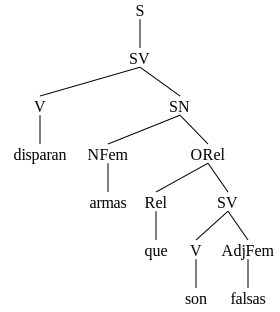

In [11]:
# Recursive Descent Parser

def parser(oracion, gramatica):                   
    oracion = oracion.lower()
    if oracion.endswith('.'):
        oracion = re.sub('\.',' ',oracion)
    else:
        oracion = oracion
    lista_palabras = oracion.split()
    gramatica = nltk.data.load(gramatica, cache=False)
    rd_parser = nltk.RecursiveDescentParser(gramatica)
    for arbol in rd_parser.parse(lista_palabras):
        return(arbol)

oracion3 = 'Disparan armas que son falsas.' 
gramatica = 'gramaticas/CFG.cfg'                       
parser(oracion3, gramatica)  

Adviértase que las reglas ```SN -> NFem ORel``` y ```ORel -> SV``` podrían dar lugar a la recursividad, ya que ```SV -> V SN```. Podrían generarse, entonces, oraciones como _Disparan armas que son piezas que son piñas que son armas_ y así hasta el infinito, aunque ```SV -> V AdjFem``` clausura esta posibilidad.

Nótese también que aquí, para capturar la concordancia entre _armas_ y _falsas_ debimos limitar las reglas de reescritura a los nombres y adjetivos femeninos, aunque no se encuentren en el mismo nivel oracional.